In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/rounded/rounded_hours_student_scores.csv')
df.head()

,Hours,Scores
0,1.1,41
1,1.2,40
2,1.4,38
3,1.5,39
4,1.6,36


In [3]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
df.describe()

,Hours,Scores
count,60.000000,60.000000
mean,5.150000,46.433333
std,2.402365,5.699737
min,1.100000,36.000000
25%,3.150000,41.000000
50%,5.150000,47.000000
75%,7.150000,50.000000
max,9.200000,65.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   60 non-null     float64
 1   Scores  60 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


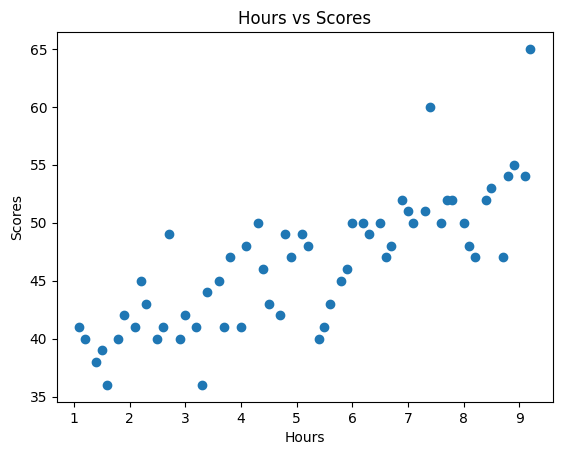

In [6]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours')  
plt.ylabel('Scores')
plt.title('Hours vs Scores') 
plt.show()

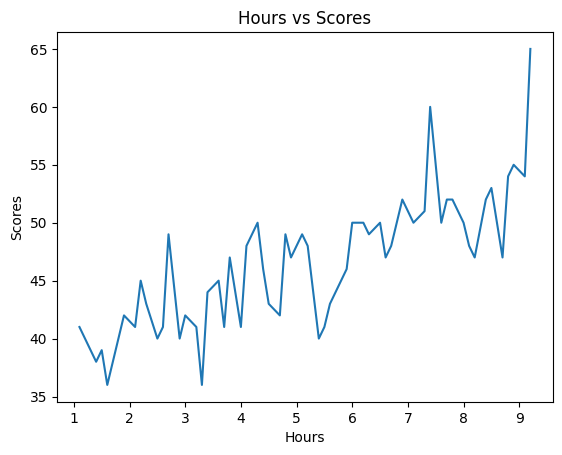

In [7]:
plt.plot(df['Hours'], df['Scores'])
plt.xlabel('Hours')  
plt.ylabel('Scores')
plt.title('Hours vs Scores') 
plt.show()

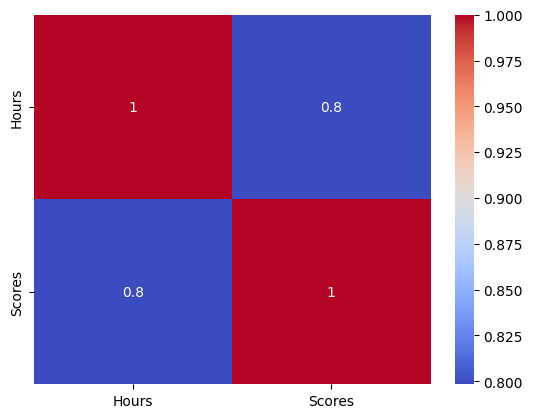

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**From the graph we can conclude that, As number of hours of study increases number of marks in exam also increases. They are directly proportional to each other.**

In [9]:
from sklearn.preprocessing import MinMaxScaler

target_values = df['Scores'].values 
features = df.drop('Scores', axis=1).values  

scaler_features = MinMaxScaler()  
features_scaled = scaler_features.fit_transform(features) 
scaler_target = MinMaxScaler() 
target_scaled = scaler_target.fit_transform(target_values.reshape(-1, 1)).flatten()  
df['Hours'] = features_scaled
df['Scores'] = target_scaled
df.head()

,Hours,Scores
0,0.000000,0.172414
1,0.012346,0.137931
2,0.037037,0.068966
3,0.049383,0.103448
4,0.061728,0.000000


In [16]:
n_features = features_scaled.shape[1]  
weights = np.zeros(n_features)  
bias = 0 

learning_rate = 0.2
iterations = 10
losses = []

for i in range(iterations):
    y_pred = np.dot(features_scaled, weights) + bias
    errors = target_scaled - y_pred
    weights += learning_rate * np.dot(features_scaled.T, errors) / len(features_scaled)
    bias += learning_rate * np.mean(errors)

    loss = np.mean(errors**2)
    print(f"Iteration {i+1}: Loss = {loss}")
    losses.append(loss)

Iteration 1: Loss = 0.16741973840665872
Iteration 2: Loss = 0.10438889988429415
Iteration 3: Loss = 0.06914289601349467
Iteration 4: Loss = 0.049377404622886985
Iteration 5: Loss = 0.03823852315917436
Iteration 6: Loss = 0.031908366198964984
Iteration 7: Loss = 0.02826018529631885
Iteration 8: Loss = 0.026109238418525818
Iteration 9: Loss = 0.024795506189481422
Iteration 10: Loss = 0.023951254763875534


In [10]:
n_features = features_scaled.shape[1]
weights = np.zeros(n_features)
bias = 0

initial_learning_rate = 0.2
learning_rate = initial_learning_rate
momentum = 0.9  
iterations = 100  
losses = []
min_loss = float('inf')  
tolerance = 1e-6  
early_stopping_patience = 10  
no_improvement_count = 0  

for i in range(iterations):
    y_pred = np.dot(features_scaled, weights) + bias
    errors = target_scaled - y_pred

    gradient_w = np.dot(features_scaled.T, errors) / len(features_scaled)
    gradient_b = np.mean(errors)
    weights += learning_rate * gradient_w + momentum * np.sum(gradient_w)
    bias += learning_rate * gradient_b + momentum * gradient_b

    loss = np.mean(errors**2)
    print(f"Iteration {i+1}: Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")
    losses.append(loss)

    if loss < min_loss:
        min_loss = loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= early_stopping_patience:
        print("Early stopping triggered. No improvement in loss.")
        break

    if i > 0:
        loss_diff = losses[i - 1] - losses[i]
        relative_change = loss_diff / losses[i - 1] if losses[i - 1] != 0 else 0

        if loss_diff > 0 and relative_change > tolerance:  
            learning_rate *= 1.05  
        elif loss_diff < 0: 
            learning_rate *= 0.5  

    learning_rate = np.clip(learning_rate, 1e-8, 1.0)

print(f"Training complete. Minimum Loss = {min_loss:.6f}")


Iteration 1: Loss = 0.167420, Learning Rate = 0.200000
Iteration 2: Loss = 0.046223, Learning Rate = 0.200000
Iteration 3: Loss = 0.026079, Learning Rate = 0.210000
Iteration 4: Loss = 0.021912, Learning Rate = 0.220500
Iteration 5: Loss = 0.020328, Learning Rate = 0.231525
Iteration 6: Loss = 0.019288, Learning Rate = 0.243101
Iteration 7: Loss = 0.018449, Learning Rate = 0.255256
Iteration 8: Loss = 0.017739, Learning Rate = 0.268019
Iteration 9: Loss = 0.017131, Learning Rate = 0.281420
Iteration 10: Loss = 0.016612, Learning Rate = 0.295491
Iteration 11: Loss = 0.016168, Learning Rate = 0.310266
Iteration 12: Loss = 0.015789, Learning Rate = 0.325779
Iteration 13: Loss = 0.015466, Learning Rate = 0.342068
Iteration 14: Loss = 0.015191, Learning Rate = 0.359171
Iteration 15: Loss = 0.014958, Learning Rate = 0.377130
Iteration 16: Loss = 0.014760, Learning Rate = 0.395986
Iteration 17: Loss = 0.014593, Learning Rate = 0.415786
Iteration 18: Loss = 0.014453, Learning Rate = 0.436575
I

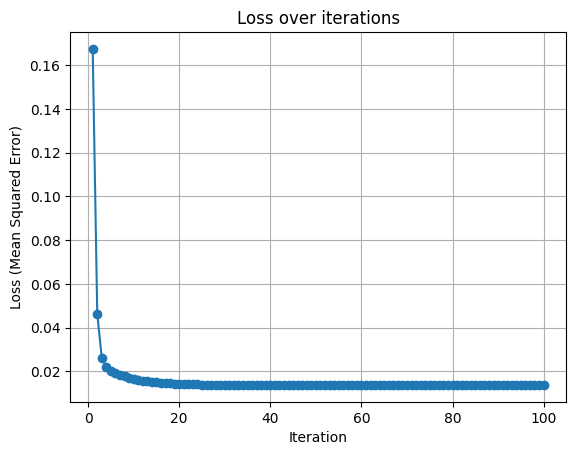

In [11]:
plt.plot(range(1, iterations + 1), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Loss over iterations')
plt.grid(True)
plt.show()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def gradient_descent(X_scaled, y_scaled, learning_rate, iterations):
    num_features = X_scaled.shape[1]
    weights = np.zeros(num_features)
    bias = 1
    n = len(X_scaled)
    losses = []

    for i in range(iterations):
        y_pred_scaled = np.dot(X_scaled, weights) + bias
        loss = np.mean((y_scaled - y_pred_scaled)**2)
        losses.append(loss)
        dw = (2 / n) * np.dot(X_scaled.T, (y_pred_scaled - y_scaled))
        db = (2 / n) * np.sum(y_pred_scaled - y_scaled)
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, losses

learning_rate = 0.7
iterations = 150

weights, bias, losses = gradient_descent(features_scaled, target_scaled, learning_rate, iterations)
y_pred_scaled = np.dot(features_scaled, weights) + bias
loss = np.mean((target_scaled - y_pred_scaled)**2)
print(f"\nLoss with Best Learning Rate ({learning_rate}) and Iteration ({iterations}): {loss:.6f}")


Loss with Best Learning Rate (0.7) and Iteration (150): 0.013773


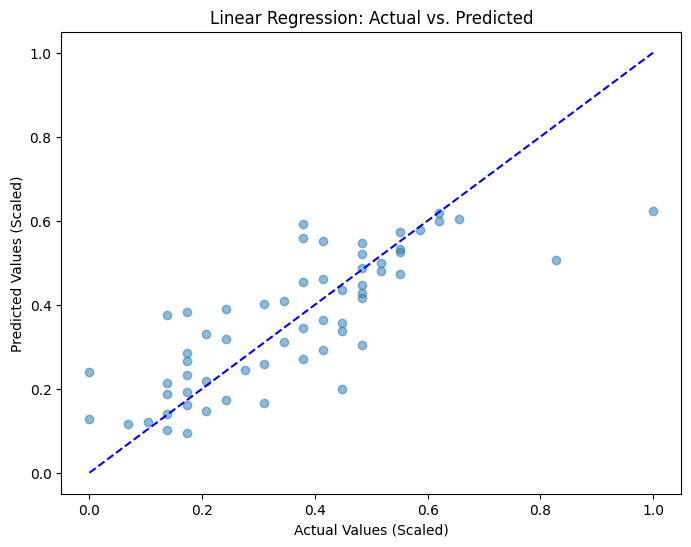

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(target_scaled, y_pred_scaled, alpha=0.5)
plt.plot([min(target_scaled), max(target_scaled)], [min(target_scaled), max(target_scaled)], color='blue', linestyle='--')
plt.xlabel("Actual Values (Scaled)")
plt.ylabel("Predicted Values (Scaled)")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()